In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
proyect_base = "/content/drive/My Drive/CMU '19/Proy_02/"
m="/content/drive/My Drive/Itam/Mineria de Datos/Carnegie/Proy_02/"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv(m + 'diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.0.3


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


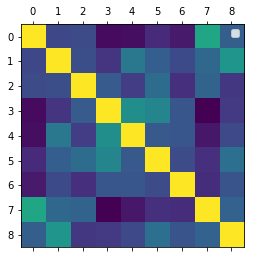

In [0]:
plt.matshow(df.corr())
plt.legend(df.columns)

In [0]:
test_cases = df[df.Outcome==1].sample(n=268, axis=0, replace=True).append(df[df.Outcome==0].sample(n=268, axis=0, replace=True))

In [0]:
test_cases.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,3.942164,122.537313,70.179104,20.692164,81.878731,32.981716,0.484235,33.222015,0.500000
std,3.430269,35.301088,19.638071,16.345579,114.910181,7.580911,0.324239,11.268895,0.500467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,101.000000,64.000000,0.000000,0.000000,27.800000,0.242500,24.000000,0.000000
50%,3.000000,119.000000,72.000000,24.000000,36.000000,32.800000,0.389000,29.000000,0.500000
75%,6.000000,145.250000,80.000000,33.000000,130.000000,37.400000,0.666750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,67.000000,1.000000


In [0]:
with open(proyect_base + 'clean.csv', 'w') as file:
  file.write(test_cases.to_csv(index=False))

FileNotFoundError: ignored

## BMI

An average BMI of 31.99 indicates that most of the subjects were obese

Underweight: Your BMI is less than 18.5

Healthy weight: Your BMI is 18.5 to 24.9

Overweight: Your BMI is 25 to 29.9

Obese: Your BMI is 30 or higher

In [0]:
df['weight_status']=np.where(
    df.BMI<18.5,'underweight',
    np.where((df.BMI>=18.5)&(df.BMI<=24.9),'normal',
             np.where((df.BMI>24.9)&(df.BMI<29.9),'overweight',
                      np.where(df.BMI>=29.9,'obese','na' ))))

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,weight_status
0,6,148,72,35,0,33.6,0.627,50,1,obese
1,1,85,66,29,0,26.6,0.351,31,0,overweight
2,8,183,64,0,0,23.3,0.672,32,1,normal
3,1,89,66,23,94,28.1,0.167,21,0,overweight
4,0,137,40,35,168,43.1,2.288,33,1,obese


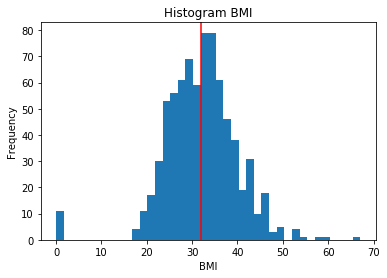

In [0]:
median= df.BMI.quantile(q=0.5)
plt.hist(df.BMI, bins= 40)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram BMI')
plt.axvline(x=median,color='red')

In [0]:
ws_count=df.groupby('weight_status')['Outcome'].count().reset_index()
ws_count['percentage_ws']=(ws_count.Outcome/ws_count.Outcome.sum())*100
ws_count

,weight_status,Outcome,percentage_ws
0,normal,102,13.281250
1,obese,477,62.109375
2,overweight,174,22.656250
3,underweight,15,1.953125


Text(0.5, 1.0, 'BMI ranges percentage')

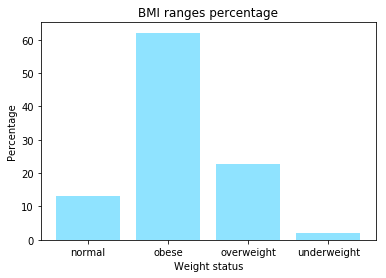

In [0]:
plt.bar(ws_count.weight_status, ws_count.percentage_ws, color='#8fe3ff')
plt.xlabel('Weight status')
plt.ylabel('Percentage')
plt.title('BMI ranges percentage')

Our data set is not balanced in respect to to the subects' BMI

In [0]:
ws_count_out=df.groupby(['weight_status', 'Outcome'])['Age'].count().reset_index()
#ws_count['percentage_ws']=(ws_count.Outcome/ws_count.Outcome.sum())*100
#ws_count
ws_count_out.rename(columns={'Age':'obs'}, inplace=True)
ws_count_out

,weight_status,Outcome,obs
0,normal,0,95
1,normal,1,7
2,obese,0,256
3,obese,1,221
4,overweight,0,136
5,overweight,1,38
6,underweight,0,13
7,underweight,1,2


In [0]:
ws_count_out=ws_count_out.merge(ws_count[['weight_status', 'Outcome']], on='weight_status')
ws_count_out['prop_ws_out']=(ws_count_out.obs/ws_count_out.Outcome_y)*100
ws_count_out

,weight_status,Outcome_x,obs,Outcome_y,prop_ws_out
0,normal,0,95,102,93.137255
1,normal,1,7,102,6.862745
2,obese,0,256,477,53.668763
3,obese,1,221,477,46.331237
4,overweight,0,136,174,78.160920
5,overweight,1,38,174,21.839080
6,underweight,0,13,15,86.666667
7,underweight,1,2,15,13.333333


The BMI on itself has little to no influence towards the outcome: 53.66% of the obese had no diabetes

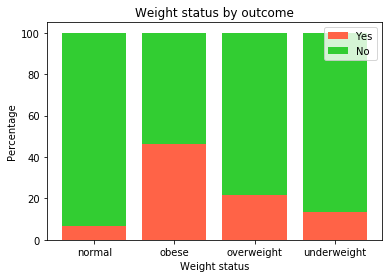

In [0]:
yes = ws_count_out[ws_count_out.Outcome_x == 1]
no = ws_count_out[ws_count_out.Outcome_x == 0]
plt.bar(yes.weight_status, yes.prop_ws_out, color = 'limegreen')
plt.bar(no.weight_status, no.prop_ws_out,color = 'tomato', bottom = yes.prop_ws_out)
plt.legend(['Yes', 'No'])
plt.xlabel('Weight status')
plt.ylabel('Percentage')
plt.title('Weight status by outcome')
plt.show()

## Relationship of weight status and Glucose towards outcome

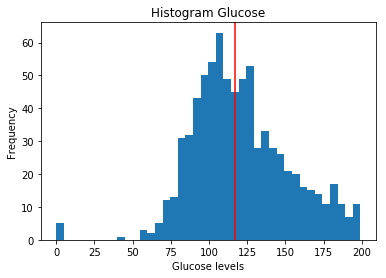

In [0]:
median= df.Glucose.quantile(q=0.5)
plt.hist(df.Glucose, bins= 40)
plt.xlabel('Glucose levels')
plt.ylabel('Frequency')
plt.title('Histogram Glucose')
plt.axvline(x=median,color='red')

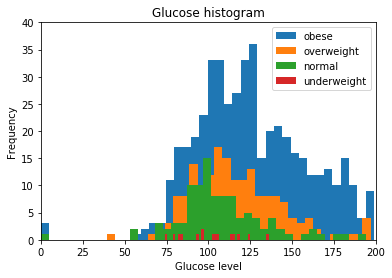

In [0]:
for status in df.weight_status.unique():
    df_g=df[df.weight_status==status]
    plt.hist(df_g.Glucose,bins=40)
    plt.title('Glucose histogram')
    #plt.title('Glucose Histogram for '+status)
    plt.xlim([0,200])
    plt.ylim([0,40])
    plt.xlabel('Glucose level')
    plt.ylabel('Frequency')
    #plt.show()
plt.legend(df.weight_status.unique())
    

A higher BMI is related to higher glucose levels

In [0]:
df.groupby('Outcome')['Glucose'].mean()

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

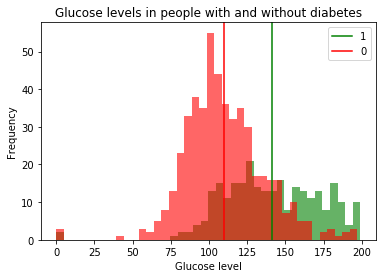

In [0]:
count=[]
colors=['','green','red']
for out in df.Outcome.unique():
    count.append(out)
    i=len(count)
    df_g=df[df.Outcome==out]
    mean=df[df.Outcome==out]['Glucose'].mean()
    plt.hist(df_g.Glucose,bins=40, alpha=0.6, color=colors[i])     
    plt.axvline(x=mean, color=colors[i])
    plt.title('Glucose levels in people with and without diabetes')
    plt.xlabel('Glucose level')
    plt.ylabel('Frequency')    
    #plt.show()
plt.legend(df.Outcome.unique())

People within the 100 glucose level range are less likely to have diabetes.
People with diabetes have an average 141 glucose level whereas people without diabetes have an average 109 glucose level

## Skin Thickness

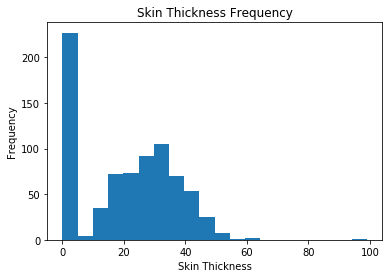

In [0]:
plt.hist(df.SkinThickness, bins=20)
plt.xlabel('Skin Thickness')
plt.ylabel('Frequency')
plt.title('Skin Thickness Frequency')
plt.show()

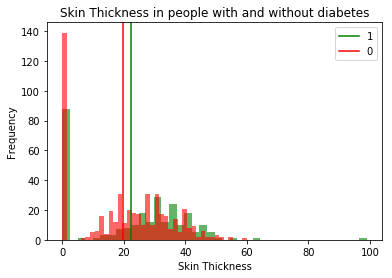

In [0]:
count=[]
colors=['','green','red']
for out in df.Outcome.unique():
    count.append(out)
    i=len(count)
    df_g=df[df.Outcome==out]
    mean=df[df.Outcome==out]['SkinThickness'].mean()
    plt.hist(df_g.SkinThickness,bins=40, alpha=0.6, color=colors[i])     
    plt.axvline(x=mean, color=colors[i])
    plt.title('Skin Thickness in people with and without diabetes')
    plt.xlabel('Skin Thickness')
    plt.ylabel('Frequency')    
    #plt.show()
plt.legend(df.Outcome.unique())

Skin Thickness is not relevant towards determining the probability of diabetes. One might consider removing it for the ML algorithm

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,weight_status
0,6,148,72,35,0,33.6,0.627,50,1,obese
1,1,85,66,29,0,26.6,0.351,31,0,overweight
2,8,183,64,0,0,23.3,0.672,32,1,normal
3,1,89,66,23,94,28.1,0.167,21,0,overweight
4,0,137,40,35,168,43.1,2.288,33,1,obese


## Diabetes Pedigree Function
A function which scores the likelihood of diabetes based on family history. It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.

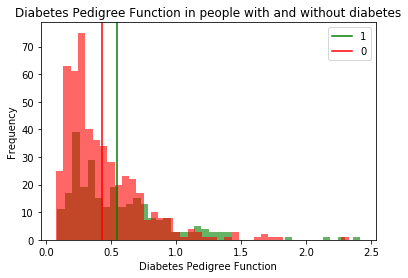

In [0]:
count=[]
colors=['','green','red']
for out in df.Outcome.unique():
    count.append(out)
    i=len(count)
    df_g=df[df.Outcome==out]
    mean=df[df.Outcome==out]['DiabetesPedigreeFunction'].mean()
    plt.hist(df_g.DiabetesPedigreeFunction,bins=40, alpha=0.6, color=colors[i])     
    plt.axvline(x=mean, color=colors[i])
    plt.title('Diabetes Pedigree Function in people with and without diabetes')
    plt.xlabel('Diabetes Pedigree Function')
    plt.ylabel('Frequency')    
    #plt.show()
plt.legend(df.Outcome.unique())

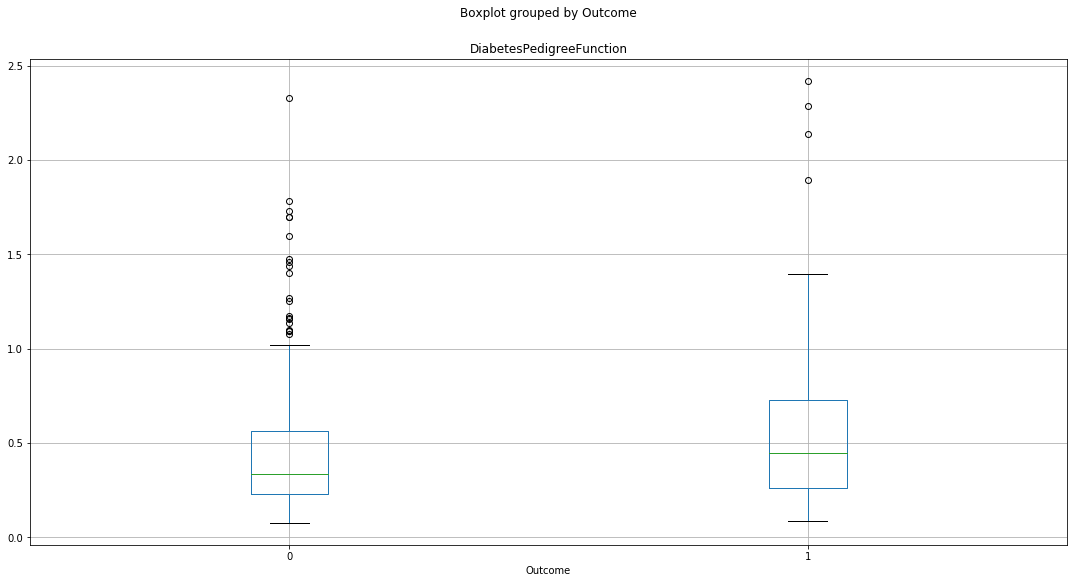

In [0]:
df.boxplot(column='DiabetesPedigreeFunction', by='Outcome', figsize=(18,9))


Though the difference is small(DiabetesPedigreeFunction's range is between 0 and 2.5), subjects with diabetes do tend to have a bigger Diabetes Pedigree Function number

## Glucose and pregnancies

In [0]:
preg_gluc_mean=df.groupby('Pregnancies')['Glucose'].mean().reset_index()

(100, 180)

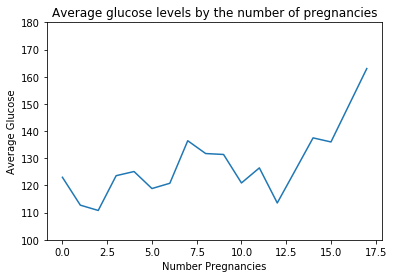

In [0]:
plt.plot(preg_gluc_mean.Pregnancies, preg_gluc_mean.Glucose)
plt.xlabel('Number Pregnancies')
plt.ylabel('Average Glucose')
plt.title('Average glucose levels by the number of pregnancies')
plt.ylim([100,180])

More pregnancies lead to higher glucose levels

## Blood Pressure

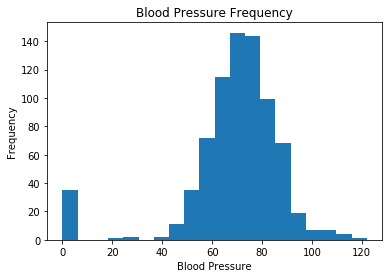

In [0]:
plt.hist(df.BloodPressure, bins=20)
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.title('Blood Pressure Frequency')
plt.show()

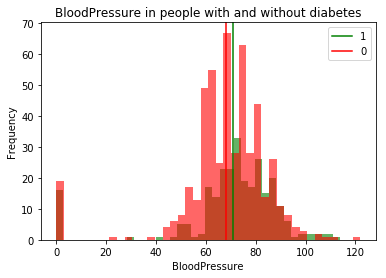

In [0]:
count=[]
colors=['','green','red']
for out in df.Outcome.unique():
    count.append(out)
    i=len(count)
    df_g=df[df.Outcome==out]
    mean=df[df.Outcome==out]['BloodPressure'].mean()
    plt.hist(df_g.BloodPressure,bins=40, alpha=0.6, color=colors[i])     
    plt.axvline(x=mean, color=colors[i])
    plt.title('BloodPressure in people with and without diabetes')
    plt.xlabel('BloodPressure')
    plt.ylabel('Frequency')    
    #plt.show()
plt.legend(df.Outcome.unique())

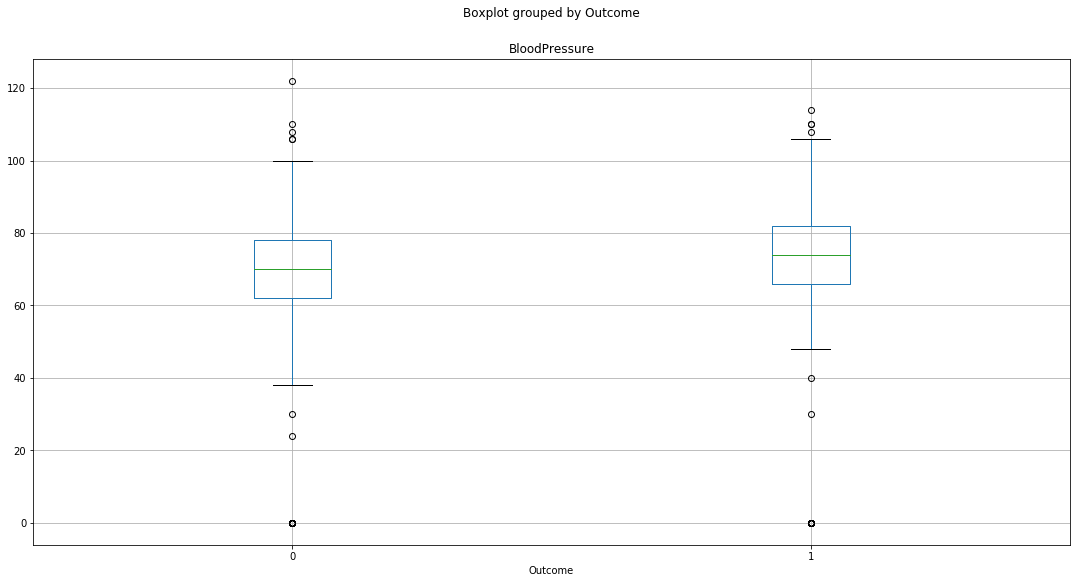

In [0]:
df.boxplot(column='BloodPressure', by='Outcome', figsize=(18,9))

People with diabetes have a higher blood pressure

## Age

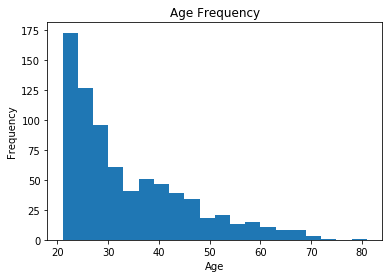

In [0]:
plt.hist(df.Age, bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency')
plt.show()

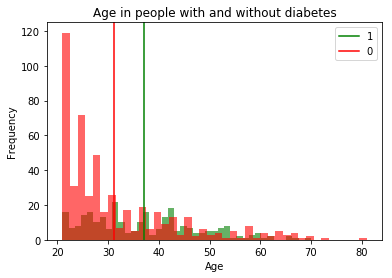

In [0]:
count=[]
colors=['','green','red']
for out in df.Outcome.unique():
    count.append(out)
    i=len(count)
    df_g=df[df.Outcome==out]
    mean=df[df.Outcome==out]['Age'].mean()
    plt.hist(df_g.Age,bins=40, alpha=0.6, color=colors[i])     
    plt.axvline(x=mean, color=colors[i])
    plt.title('Age in people with and without diabetes')
    plt.xlabel('Age')
    plt.ylabel('Frequency')    
    #plt.show()
plt.legend(df.Outcome.unique())

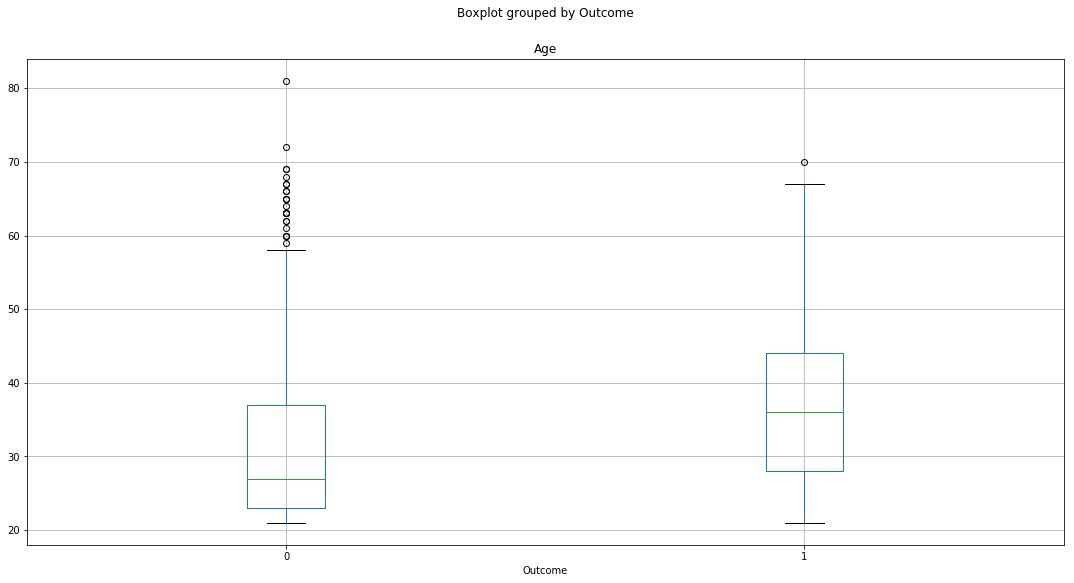

In [0]:
df.boxplot(column='Age', by='Outcome', figsize=(18,9))

Older people are more prone to having diabetes. People above 50 years old who do not have diabetes are considered atypical

**CLEANING THE DATABASE**

In [0]:
Glucose_mean=df[df.Glucose!=0].Glucose.mean()
BloodPressure_mean=df[df.BloodPressure!=0].BloodPressure.mean()
SkinThickness_mean=df[df.SkinThickness!=0].SkinThickness.mean()
Insulin_mean=df[df.Insulin!=0].Insulin.mean()
BMI_mean=df[df.BMI!=0].BMI.mean()
df.Glucose=df.Glucose.replace(0,Glucose_mean)
df.BloodPressure=df.BloodPressure.replace(0,BloodPressure_mean)
df.SkinThickness=df.SkinThickness.replace(0, SkinThickness_mean)
df.Insulin=df.Insulin.replace(0,Insulin_mean)
df.BMI=df.BMI.replace(0,BMI_mean)